In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [5]:
train=pd.read_csv(r'C:\Users\19pw03\Downloads\train_data.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test=pd.read_csv(r'C:\Users\19pw03\Downloads\test_data.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
train_orginal_data=train.copy()
test_orginal_data=test.copy()

In [8]:
#12 independent variables and 1 target variable, i.e. Loan_Status in the training dataset.
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [10]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
train.shape

(614, 13)

In [12]:
test.shape

(367, 12)

In [13]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [14]:
#Normalizing
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

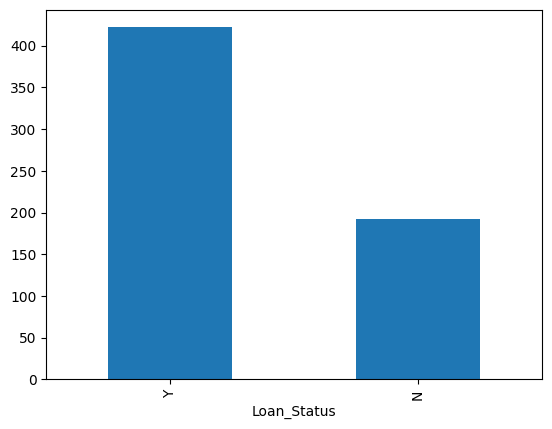

In [15]:
train['Loan_Status'].value_counts().plot.bar()

Independent Variable (Categorical)

<Axes: title={'center': 'Gender'}, xlabel='Gender'>

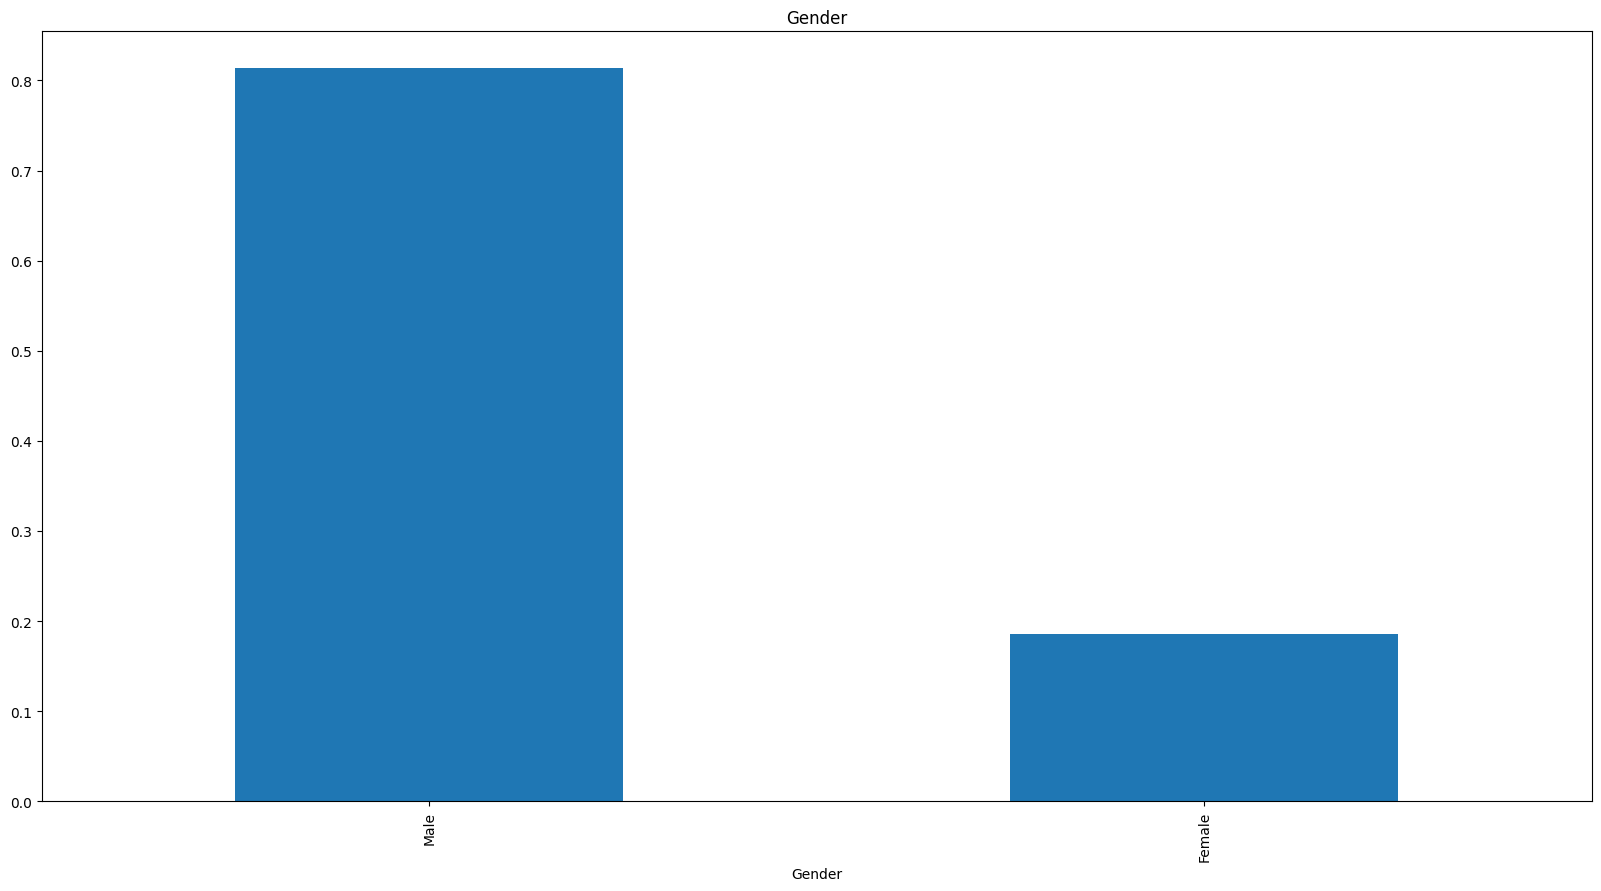

In [16]:
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender',figsize=(20,10))

<Axes: title={'center': 'Married'}, xlabel='Married'>

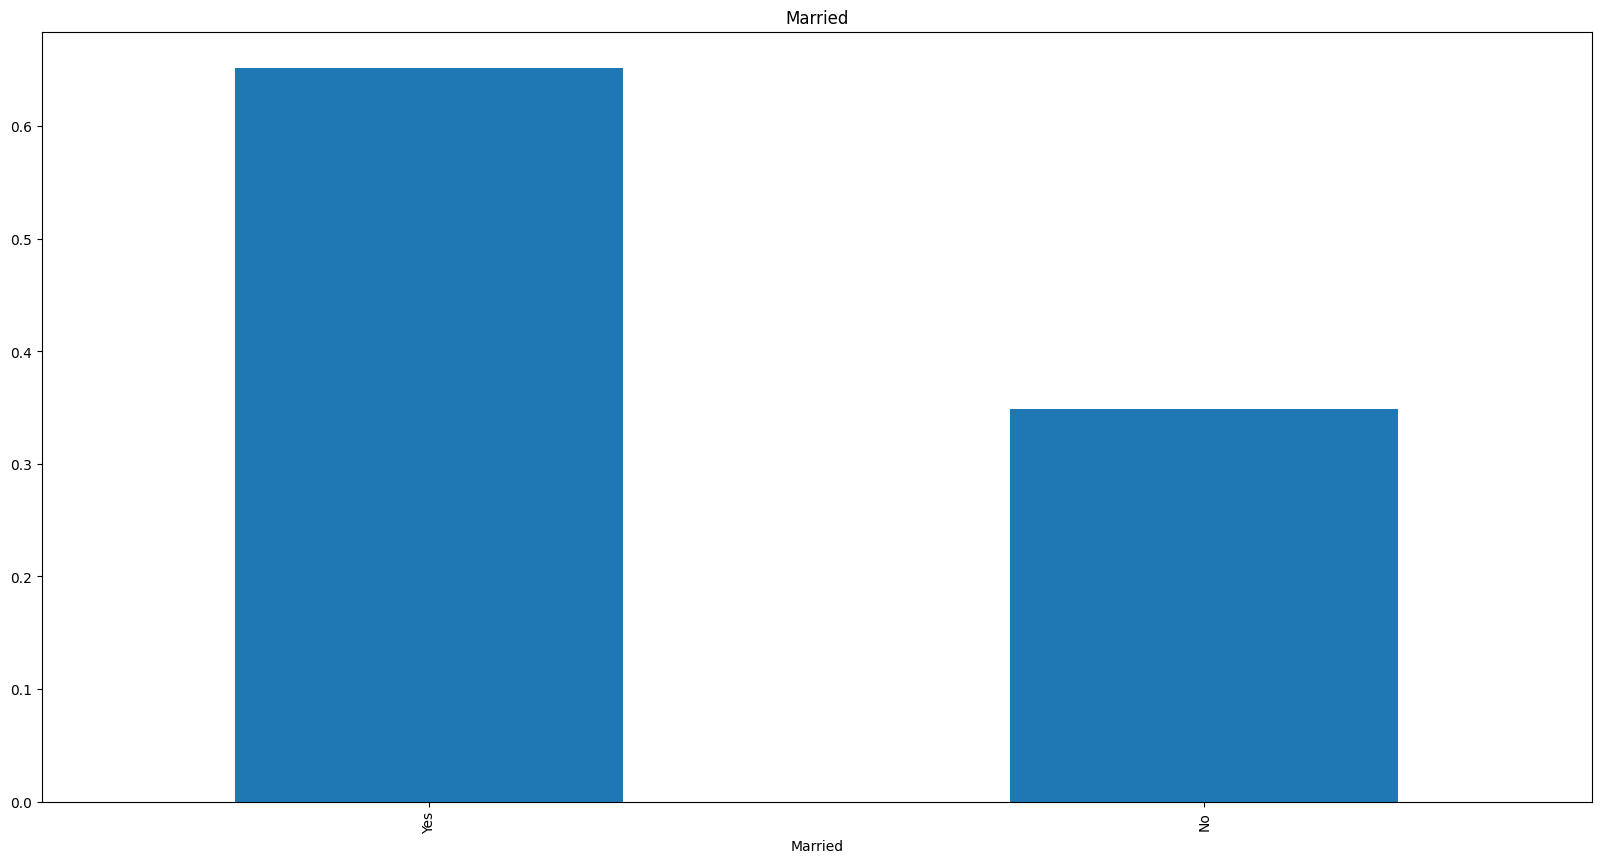

In [17]:
train['Married'].value_counts(normalize=True).plot.bar(title='Married',figsize=(20,10))

Independent Variable (Ordinal)

<Axes: title={'center': 'Dependents'}, xlabel='Dependents'>

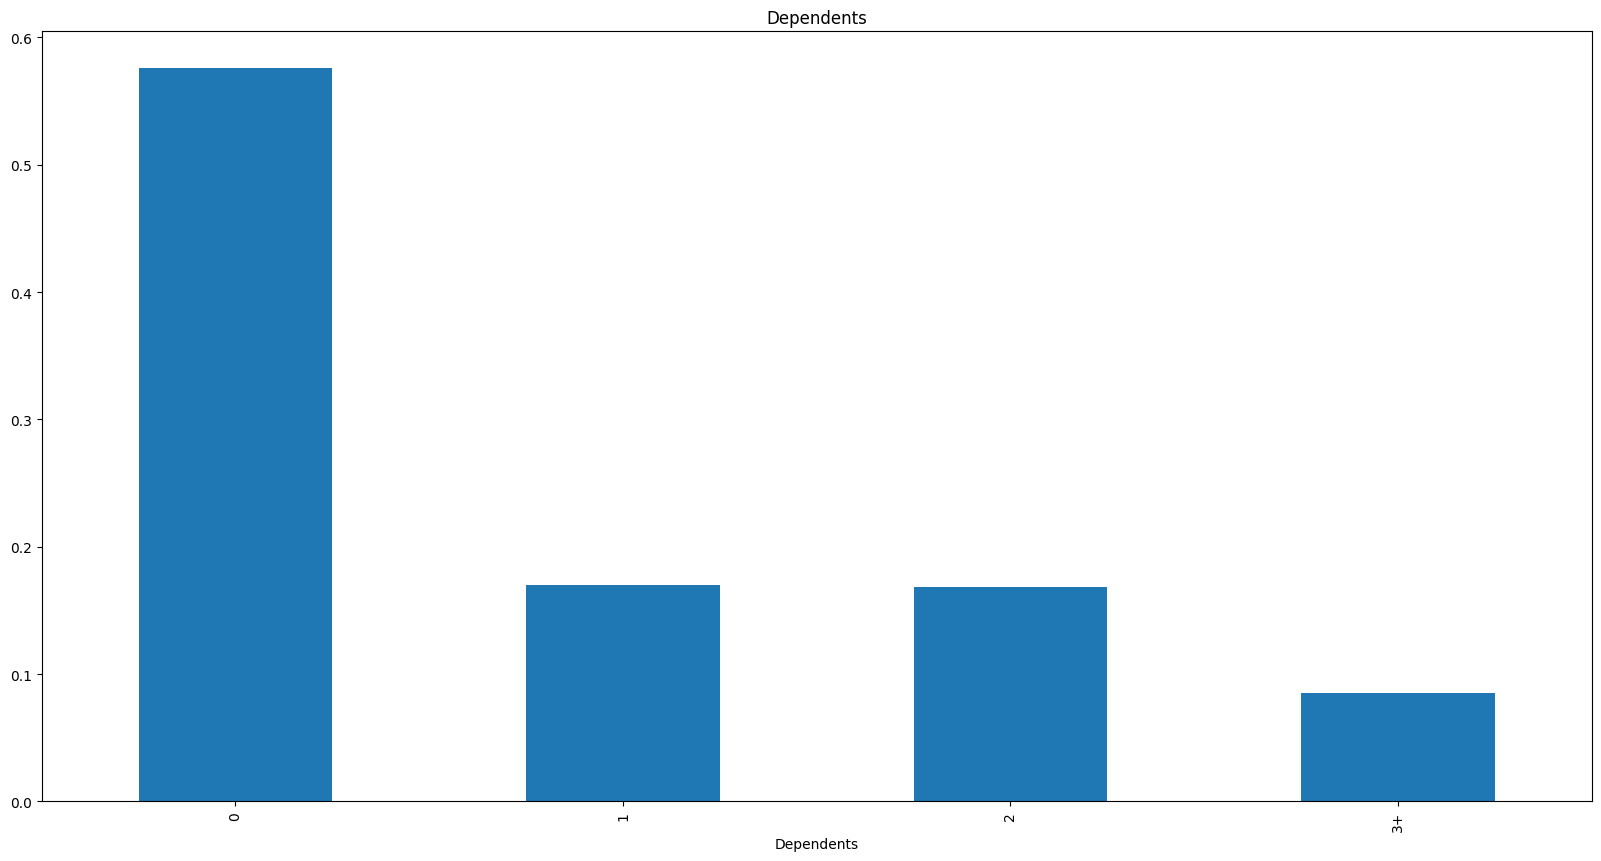

In [18]:
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents',figsize=(20,10))

<Axes: title={'center': 'Education'}, xlabel='Education'>

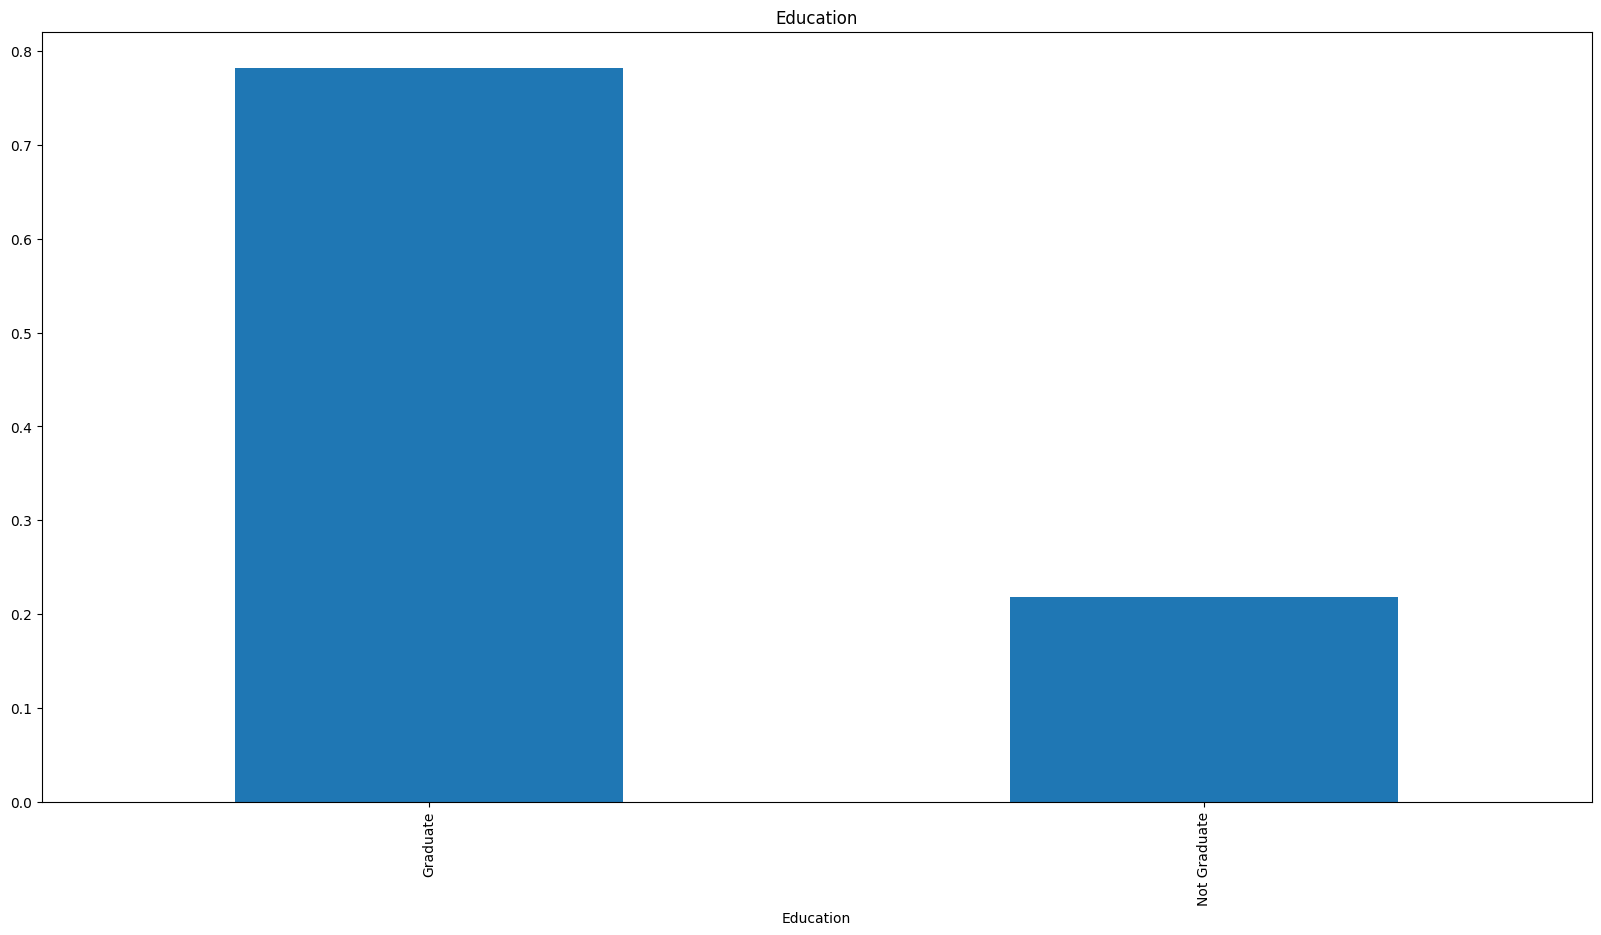

In [19]:
train['Education'].value_counts(normalize=True).plot.bar(title='Education',figsize=(20,10))

Independent Variable (Numerical)

C:\Users\19pw03\AppData\Local\Temp\ipykernel_6864\4205472628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

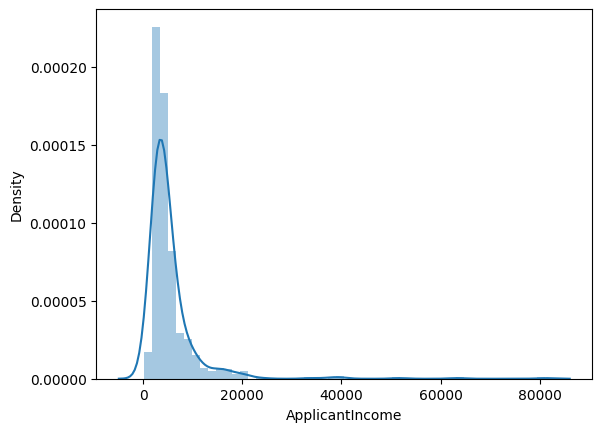

In [20]:
sns.distplot(train['ApplicantIncome'])

<Axes: >

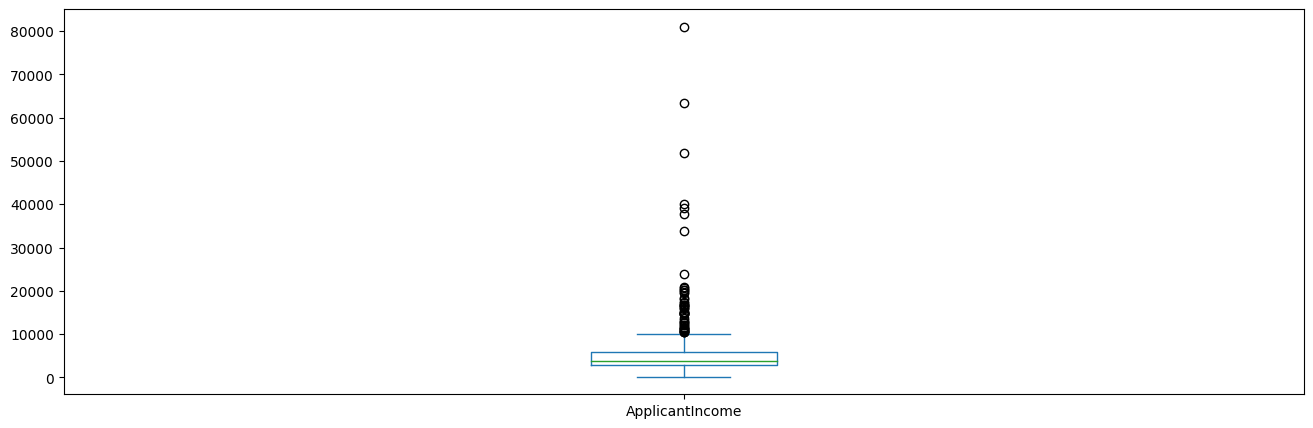

In [21]:
train['ApplicantIncome'].plot.box(figsize=(16,5))

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

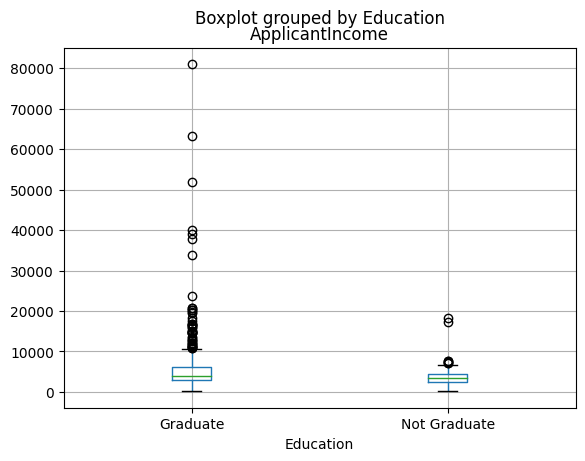

In [23]:
train.boxplot(column='ApplicantIncome',by='Education')

Missing value imputation

In [26]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)


In [30]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [32]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [35]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

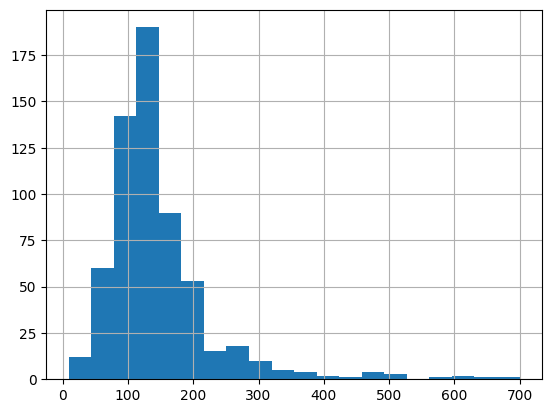

In [36]:
train['LoanAmount'].hist(bins=20)

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation.

<Axes: >

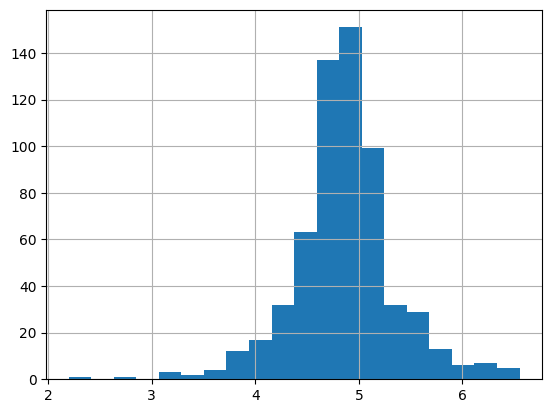

In [38]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

<Axes: >

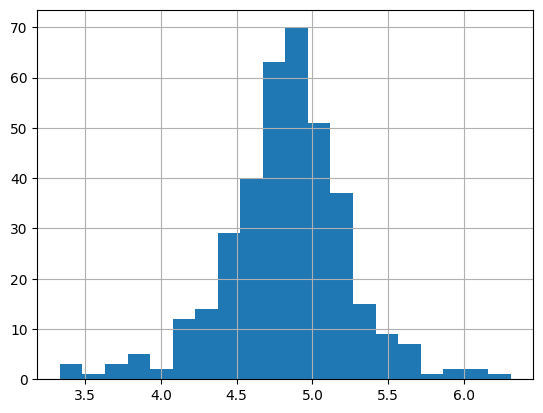

In [40]:
test['LoanAmount_log']=np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20)

Model Building


In [57]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 8.4/8.4 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 KB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 44.1/44.1 MB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [68]:
x=train.iloc[:,1:12].values
y=train.iloc[:,12].values

In [69]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [70]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=0)
classifier.fit(xtrain,ytrain)

ValueError: could not convert string to float: 'Male'